<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Space_X_Falcon_9_EDA_Feat_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [48]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df = pd.read_csv(url)

In [49]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


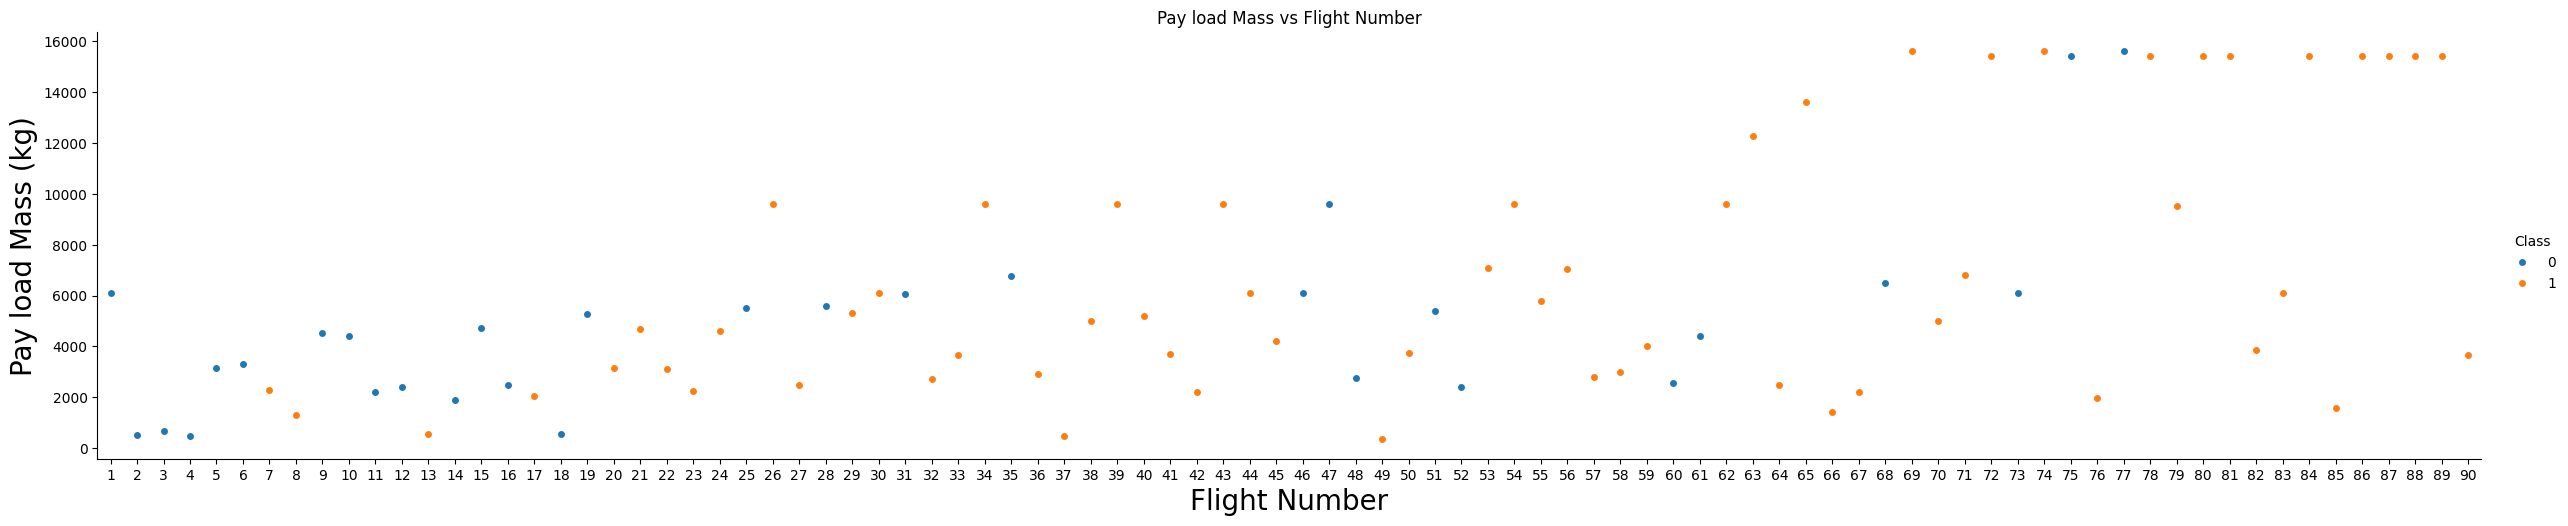

In [50]:
sns.catplot(x="FlightNumber", y="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Pay load Mass (kg)', fontsize=20)
plt.title('Pay load Mass vs Flight Number')
plt.show()

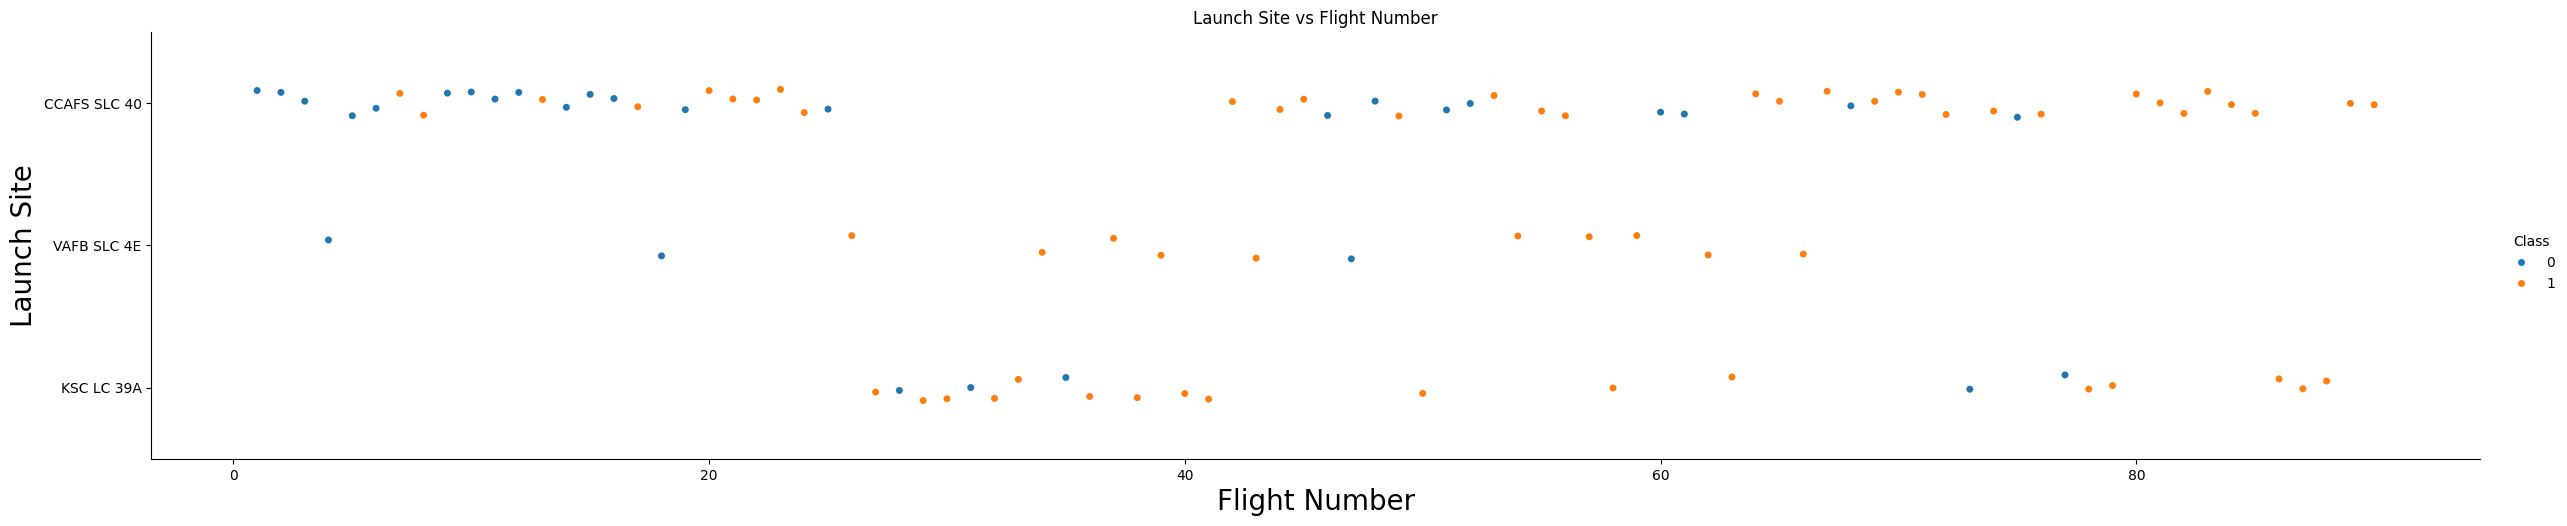

In [51]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.title('Launch Site vs Flight Number')
plt.show()

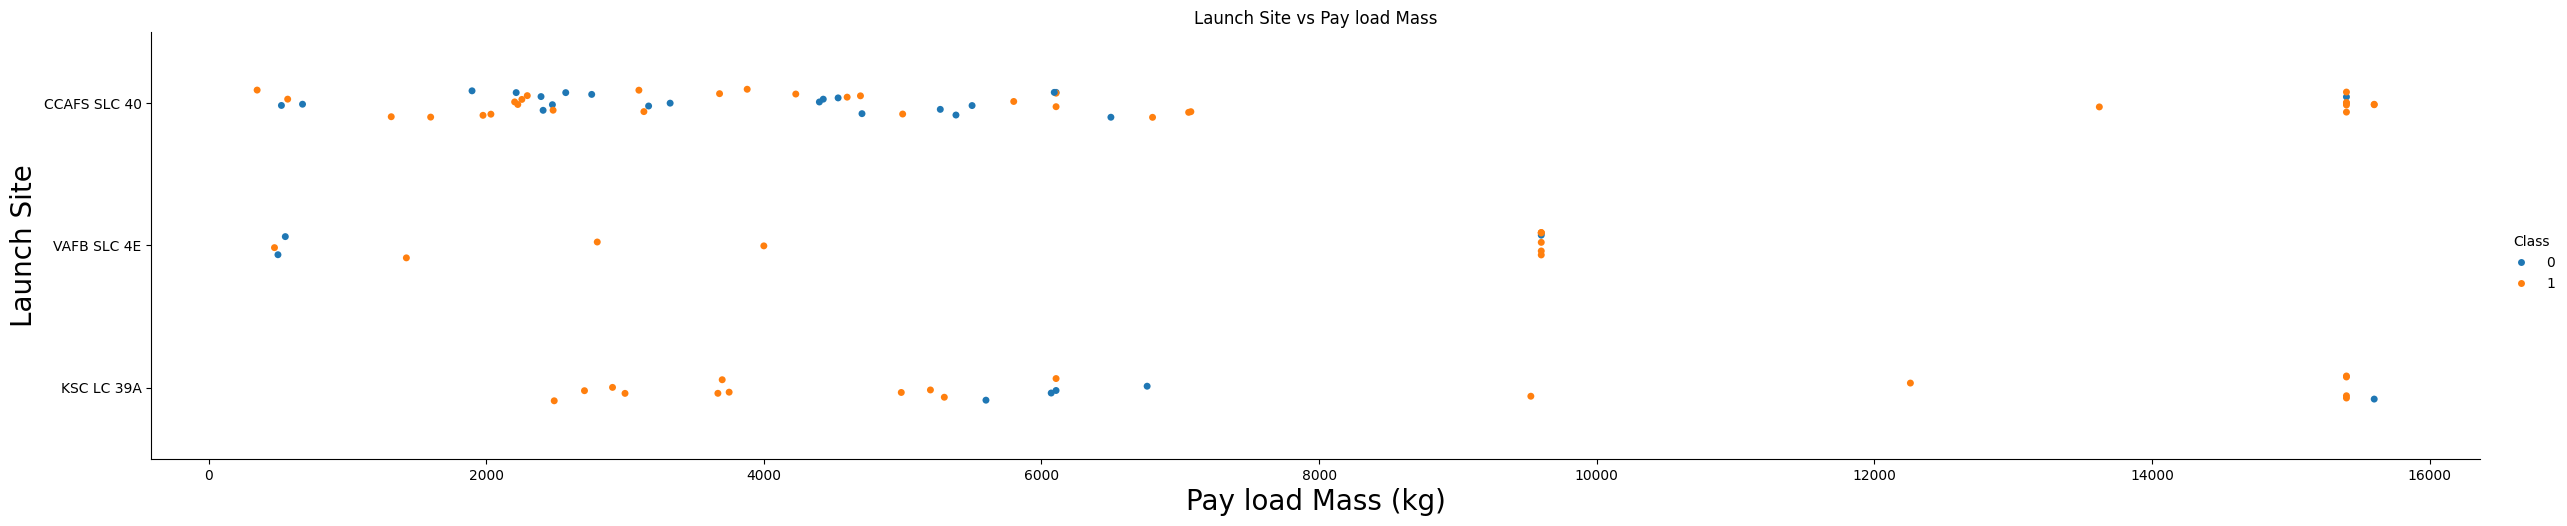

In [52]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=5)
plt.xlabel('Pay load Mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.title('Launch Site vs Pay load Mass')
plt.show()

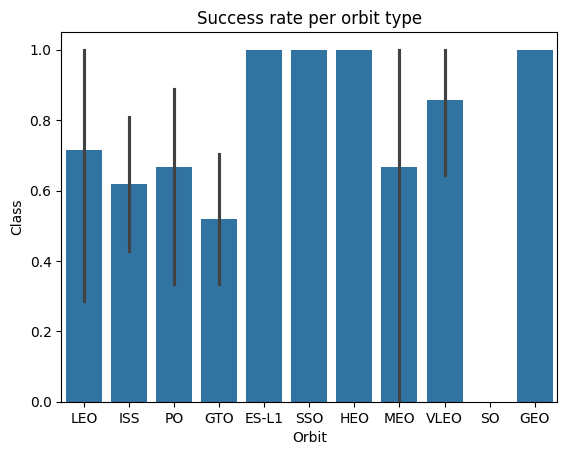

In [53]:
df_orbit = df.groupby('Orbit')['Class'].mean()
sns.barplot(x='Orbit', y='Class' , data=df)
plt.title('Success rate per orbit type')
plt.show()

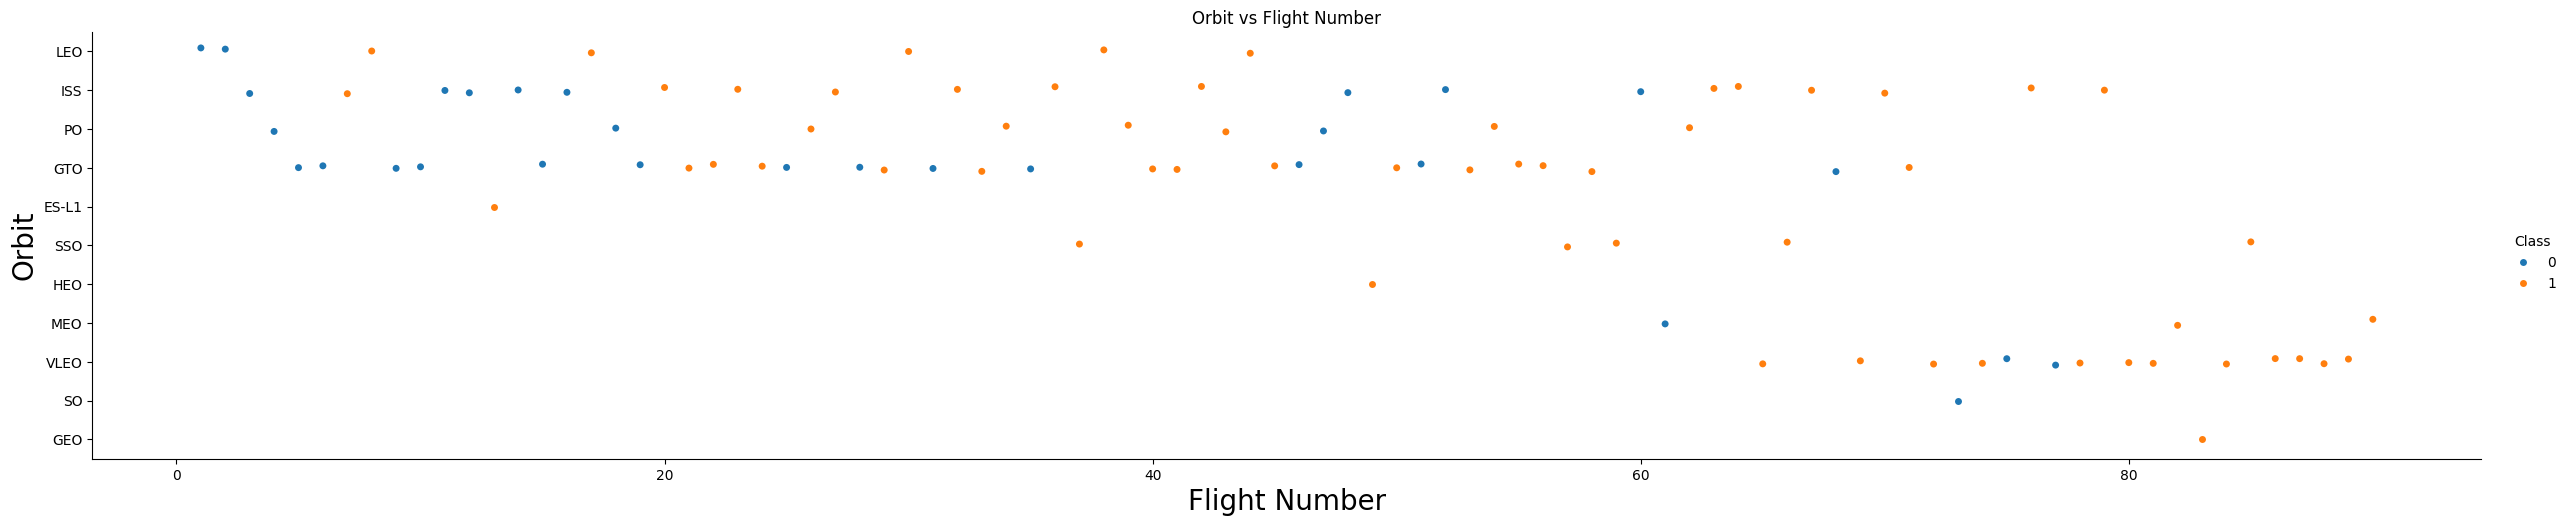

In [54]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.title('Orbit vs Flight Number')
plt.show()

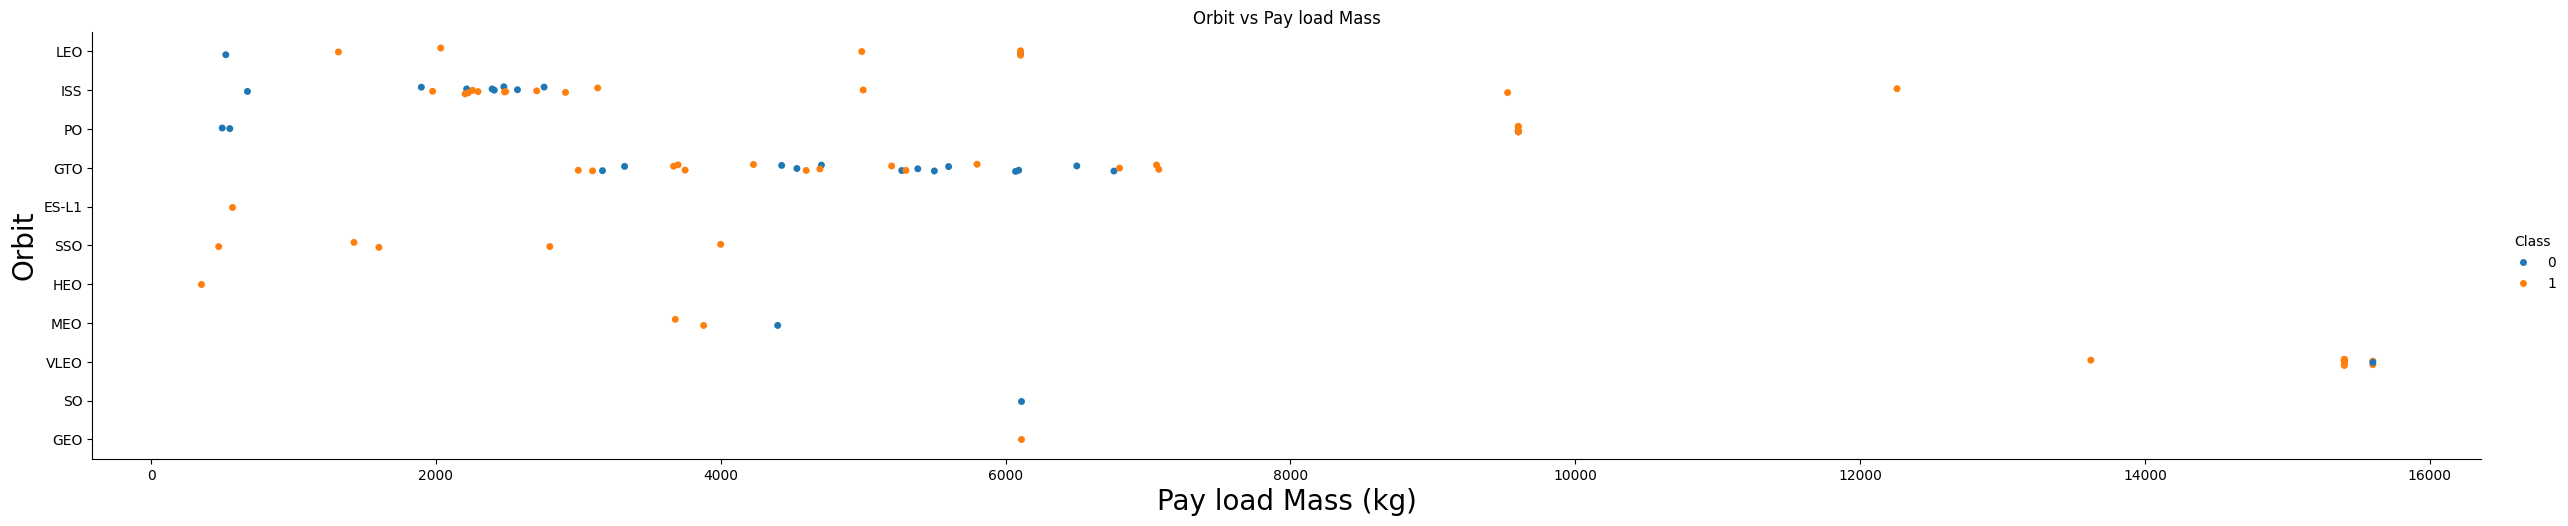

In [55]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel('Pay load Mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.title('Orbit vs Pay load Mass')
plt.show()

In [56]:
df['Date'] = pd.to_datetime(df['Date']).dt.year

In [57]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [58]:
df_date = df.groupby('Date')['Class'].mean()

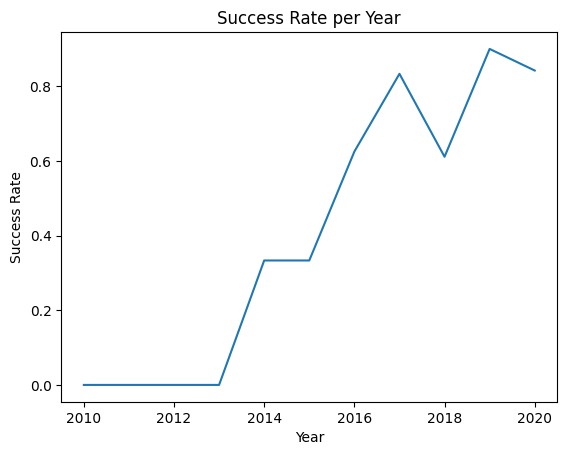

In [59]:
sns.lineplot(x=df_date.index, y=df_date.values)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.title('Success Rate per Year')
plt.show()

In [60]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [65]:
features_one_hot = pd.get_dummies(features, dtype=int)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
features_one_hot.shape

(90, 80)

In [67]:
features_one_hot.dtypes

,0
FlightNumber,int64
PayloadMass,float64
Flights,int64
GridFins,bool
Reused,bool
...,...
Serial_B1056,int64
Serial_B1058,int64
Serial_B1059,int64
Serial_B1060,int64


In [68]:
features_one_hot = features_one_hot.astype('float')

In [69]:
features_one_hot.dtypes

,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64
...,...
Serial_B1056,float64
Serial_B1058,float64
Serial_B1059,float64
Serial_B1060,float64


In [70]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)